# Linear Regression Simulator

#### Linear regression is a simple model used to predict an output based on a set of inputs. This model assumes that you have data that behaves in a linear fashion

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
random.seed(4321)

## Step 1: Generate Data

In [2]:
x = np.array([i for i in range(20)])
y = np.array([1, 4, 3, 2, 5, 9, 8, 7, 4, 7, 5, 10, 13, 10, 12, 15, 19, 17, 18, 20])

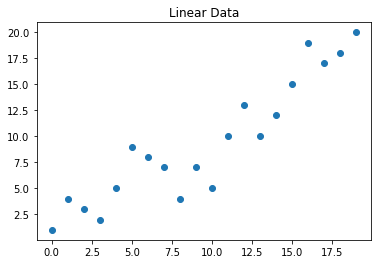

In [3]:
plt.scatter(x, y)
plt.title("Linear Data")
plt.show()

## Step 2: Try to predict the data with a line

#### This data certainly appears linear, therefore our linear model can be represented as

$\hat{Y} = mx + b$.

#### Linear regression allows us to find the line with the lowest Mean Squared Error (MSE), or the line closest on average to all points. It can do this in a number of ways, but the optimal solutions involve a little bit of calculus and a lot of algebra! The formula for MSE is

$MSE = \frac{1}{N}\sum \limits _{i=1} {(Y_{i} - \hat{Y})^{2}}$,

#### where $Y_{i}$ represents the output value of a certain point and $\hat{Y}$ represents our line's predicted outcome for that point. The relationship between $\hat{Y}$ and MSE is graphed below.

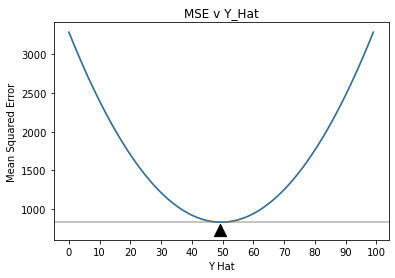

In [4]:
y_i = [i for i in range(0,100)]
y_hats = [i for i in range(0,100)]

def mean_squared_error(y_i, y_hat):   
    return np.average([(point - y_hat)**2 for point in y_i])

mse = [mean_squared_error(y_i, y_hat) for y_hat in y_hats]


fig, ax = plt.subplots()

ax.set_ylabel("Mean Squared Error")
ax.set_xlabel("Y Hat")
ax.set_title("MSE v Y_Hat")
ax.set_xticks([i for i in range(0, 100+1, 10)])

ax.plot(y_hats, mse, zorder=50)

optimal_y_hat = y_hats[mse.index(min(mse))]      # The Y hat position where the error is at a minimum
ax.axhline(min(mse), color="black", alpha = 0.3)

ax.scatter(optimal_y_hat, min(mse)-100, s=150, 
           zorder=0, marker="^", color='black')

ax.plot(y_hats, mse)

plt.show()

#### Here we can see that the Mean Squared Error forms a parabola with a minimum at a certain value (in this case where  $\hat{Y}$ = 49). We can therefore take the derivative of this function with respect to $\hat{Y}$ to find this minimum value. However, keep in mind that $\hat{Y} = mx + b$, where we are really interested in getting the coefficents of $m$ and $b$. Therefore, we can plug $\hat{Y}$ into our MSE equation and take the partial derivatives with respect to both $m$ and $b$. After performing this operation and simplyfing as much as possible, we find that:

$b = m\bar{x} - \bar{y}$ and

$m = \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{(x^{2})} - ({\bar{x}}^{2})}$

## Step 3: Find Exact Coefficents for Slope and Y-intercept

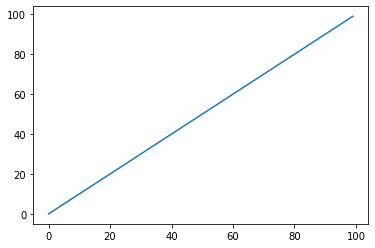

Line of best fit: Y = 1.0x + 0.0


In [5]:
def best_fit(x, y):
    
    x_bar  = np.average(x)
    y_bar  = np.average(y)
    xy_bar = np.average(np.multiply(x,y))
    x_sqd_bar = np.average(np.multiply(x,x))
    
    m = (xy_bar - (x_bar*y_bar)) / (x_sqd_bar - (x_bar**2))
    
    b = m*x_bar - y_bar
    
    return m, b

m, b = best_fit(y_i, y_hats)

plt.plot(y_i, y_hats)
plt.show()

print(f"Line of best fit: Y = {m}x + {b}")

#### This can now be applied to our very own data!

Line of best fit: Y = 0.9226x + -0.6857


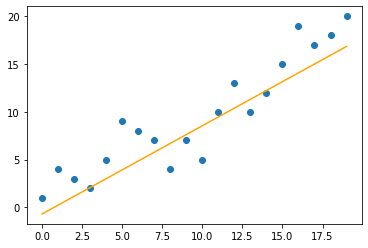

In [6]:
fig, ax = plt.subplots()

ax.scatter(x,y)

m, b = best_fit(x,y)
pred_y = [(point*m + b) for point in x]
print(f"Line of best fit: Y = {round(m,4)}x + {round(b,4)}")

ax.plot(x, pred_y, color='orange')

plt.show()

## Step 4: Implement with Gradient Descent

#### A method that may be more flexible is using "Gradient Descent". This technique is useful because it can be applied to any number of error functions, not just the mean squared error. Since our loss function in linear regression is the mean squared error, this will be the function we use with gradient descent. We should be able to approximate pretty close to our "true" m and b values!

#### First, we use the partial derivatives of our MSE with respect to $m$ and $b$ to find

$\frac{\partial{}}{\partial{b}}\frac{1}{N}\sum \limits _{i=1} {(Y_{i} - mx_{i} - b)^{2}}$ 
= $\frac{-2}{N}\sum \limits _{i=1} {(Y_{i} - mx_{i} - b)}$ 
= $\frac{-2}{N}\sum \limits _{i=1} {(Y_{i} - \hat{Y})}$

$\frac{\partial{}}{\partial{m}}\frac{1}{N}\sum \limits _{i=1} {(Y_{i} - mx_{i} - b)^{2}}$ 
= $\frac{-2}{N}\sum \limits _{i=1} {(x_{i})(Y_{i} - mx_{i} - b)}$ 
= $\frac{-2}{N}\sum \limits _{i=1} {(x_{i})(Y_{i} - \hat{Y})}$

True 'm': 0.9226, True 'b': -0.6857
G.D. 'm': 0.9501, G.D. 'b': -0.328


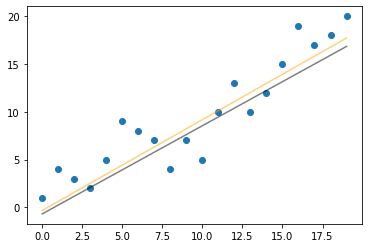

In [15]:
# Almost exactly the same as Adarsh Menon's 
# implementation of gradient descent (last 
# reference). The only difference is
# that for some reason, the "b" value is
# always negative!

m = 0 # Starting values initialized at 0
b = 0

n = (len(x))   # Number of elements in the list

l = 0.001      # Learning rate 
               # (how fast we approach the bottom of the parabola)
    
epochs = 1000  # How many times we iterate for our m and b values, more epochs means higher accuracy!

for i in range(epochs):
    
    y_pred = (m * x) + b

    dM = (-2 / n) * sum(x * (y - y_pred)) # Our change in m or b, given by partial derivative of loss function
    dB = (-2 / n) * sum(y - y_pred)       # Also Adarsh Menon's use of the sum function here is really brilliant!
    
    m = m - (l*dM) # Update our m and b according to their derivatives and the learning rate
    b = b - (l*dB)

mt,bt = best_fit(x,y)

plt.scatter(x,y)
plt.plot(x,(mt*x + bt), color='black', alpha=0.5) # The exact solution, shown as a black line
plt.plot(x,(m*x - b), color='orange', alpha=0.5)  # Our approximated solution, shown as a orange line

print(f"True 'm': {round(mt,4)},", f"True 'b': {round(bt, 4)}")
print(f"G.D. 'm': {round(m,4)},",f"G.D. 'b': {round(-b,4)}")

In [8]:
# Accomplished with reference to:
# https://harvard-iacs.github.io/2019-CS109A/lectures/lecture5/presentation/Lecture5_LinearRegression.pdf
# https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/proof-part-1-minimizing-squared-error-to-regression-line (Help when I got stuck solving for coefficents)
# https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214 (Writing equations in Jupyter Notebooks)
# https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 (Adarsh Menon's comprehensive overview of gradient descent for linear regressions)